In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img=cv2.imread('abc.png')

In [4]:
import matplotlib.pyplot as plt

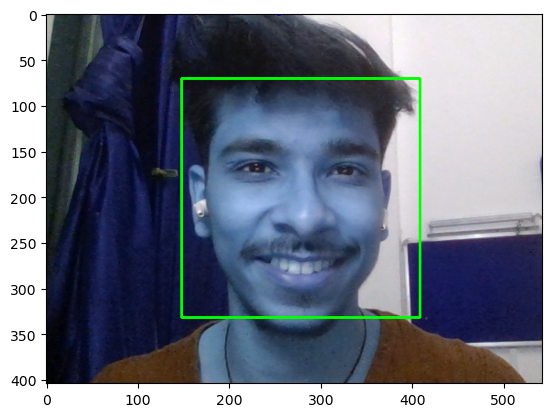

In [5]:
plt.imshow(img)

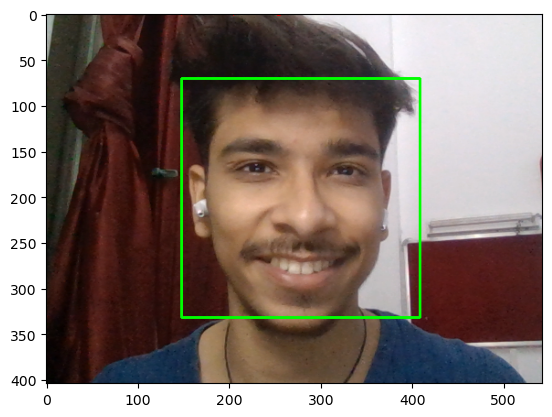

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
predictions=DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 332ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:02,  1.33it/s]

1/1 [==============================] - 0s 324ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.79it/s]

1/1 [==============================] - 0s 324ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.14it/s]

1/1 [==============================] - 0s 306ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.12it/s]


In [8]:
predictions

{'emotion': {'angry': 0.0013166479220672045,
  'disgust': 3.8189096329688255e-08,
  'fear': 5.176599984224595e-05,
  'happy': 90.70855379104614,
  'sad': 0.003119866960332729,
  'surprise': 0.11575038079172373,
  'neutral': 9.171207994222641},
 'dominant_emotion': 'happy',
 'region': {'x': 146, 'y': 69, 'w': 263, 'h': 263},
 'age': 27,
 'gender': 'Man',
 'race': {'asian': 1.5642862766981125,
  'indian': 10.470975190401077,
  'black': 77.58272290229797,
  'white': 0.3891216591000557,
  'middle eastern': 0.24038658011704683,
  'latino hispanic': 9.752505272626877},
 'dominant_race': 'black'}

In [9]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [10]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

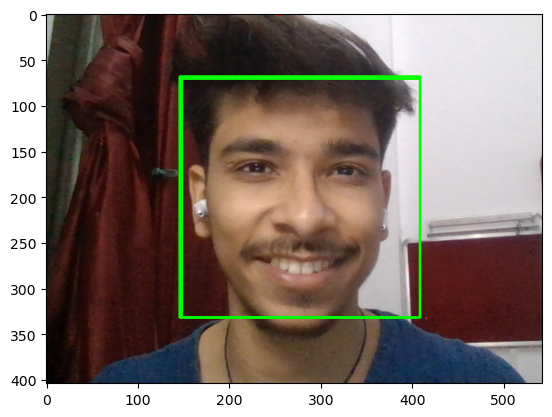

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font,1,
           (0,0,255),
           2,cv2.LINE_4);
cv2.putText(img,
           predictions['gender'],
           (0,100),
           font,1,
           (0,0,255),
           2,cv2.LINE_4);
cv2.putText(img,
           predictions['dominant_race'],
           (0,75),
           font,1,
           (0,0,255),
           2,cv2.LINE_4);
cv2.putText(img,
           predictions['emotion'],
           (0,175),
           font,1,
           (0,0,255),
           2,cv2.LINE_4);

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'


In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'],enforce_detection=False)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
           result['dominant_emotion'],
           (50,50),
           font,3,
           (0,0,255),
           2,
            cv2.LINE_4);
    cv2.imshow('Demo video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
           break
cap.release()
cv2.destroyAllWindows() 


In [ ]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cv2.namedWindow("Window")
while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'],enforce_detection=True)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('Demo video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
           break
cap.release()
cv2.destroyAllWindows() 
